In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from scipy.stats import ttest_1samp
sys.path.append('../../')
import Constants as c

In [2]:
file = "calculate_metrics_h1.csv"
df = pd.read_csv(file)

In [3]:
df.drop(df.columns[0], axis=1)
df.dropna(subset=[c.PRED_25], inplace=True)
df.dropna(subset=[c.PRED_50], inplace=True)

In [4]:
# df.describe()

In [5]:
def hypothesisTest_Effort(model, pred, mean):
    print("t-test for: {0}".format(model))
    model_records = df[df[c.MODEL] == model]
    model_records_mean = model_records[pred].mean()
    print("mean: ", model_records_mean)
    ttest_result = ttest_1samp(model_records[pred], mean)
    print("p-value: ", ttest_result.pvalue / 2)

    if ttest_result.pvalue / 2 < 0.10:
        print("Rejecting null hypothesis!")
    else:
        print("Accepting null hypothesis!")

    plt.figure(figsize=(8,3))
    plt.tight_layout()
    sb.distplot(model_records[pred])


t-test for: Line
mean:  0.25633802816901397
p-value:  3.3329093612385375e-06
Rejecting null hypothesis!


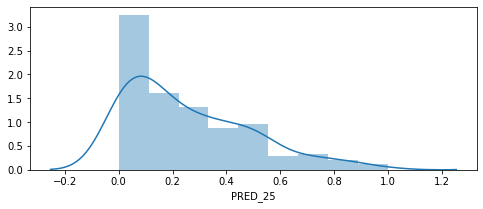

In [6]:
# t-test
hypothesisTest_Effort(c.LINE, c.PRED_25, 0.33)

t-test for: Line
mean:  0.40478873239436614
p-value:  1.9396932903938885e-22
Rejecting null hypothesis!


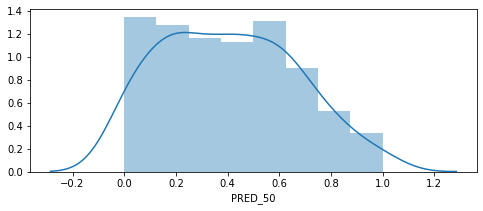

In [7]:
hypothesisTest_Effort(c.LINE, c.PRED_50, 0.60)

t-test for: Module
mean:  0.4048356807511736
p-value:  1.3699175334673368e-11
Rejecting null hypothesis!


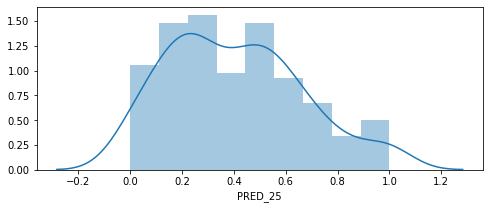

In [8]:
# t-test
hypothesisTest_Effort(c.MODULE, c.PRED_25, 0.53)

t-test for: Module
mean:  0.6025821596244133
p-value:  2.382175229222074e-38
Rejecting null hypothesis!


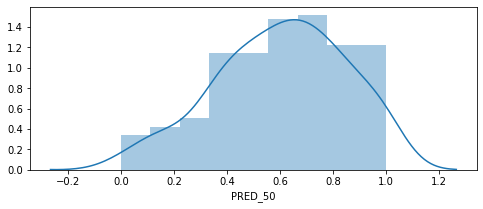

In [9]:
hypothesisTest_Effort(c.MODULE, c.PRED_50, 0.87)